In [1]:
import json
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [14]:
# Load the feasibility data (test on the casual first)
with open("../data/casuals_feas.json","r") as f:
    casuals = json.load(f)

In [15]:
# Remove the climbing point <= 6
casuals = [c for c in casuals if c["features"]["n_points"]>6]

In [16]:
data = []

# Remove the nesting structure
for row in casuals:
    feature = row["features"].copy()
    feature["climber_id"] = row["climber_id"]
    feature["route_id"] = row["route_id"]
    feature["feasible"] = row["feasible"]
    data.append(feature)

df = pd.DataFrame(data)

In [17]:
# Split into X and y
X = df[["height","weight","ape_index","strength","flexibility"]]
y = df["feasible"]

In [18]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
#  Construct and train the random forest
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Model estimate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

c:\Users\guanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\guanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\guanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [21]:
# 0: is the model performance of class 0 (not feasible)
# 1: is the model performance of class 1 (feasible)
# macro avg: the average value that not consider the proportion of clss
# weighted avg: the performance of whole model

# precision: true1/(true1+fake1)
# recall: true1/(true1+fake0)
# f1-score: Reconciled average of combined precision and recall rates
# support: the number of the sample of this class (TEST SET)
report_df

,precision,recall,f1-score,support
0,0.963704,1.000000,0.981516,1301.000000
1,0.000000,0.000000,0.000000,49.000000
accuracy,0.963704,0.963704,0.963704,0.963704
macro avg,0.481852,0.500000,0.490758,1350.000000
weighted avg,0.928725,0.963704,0.945891,1350.000000


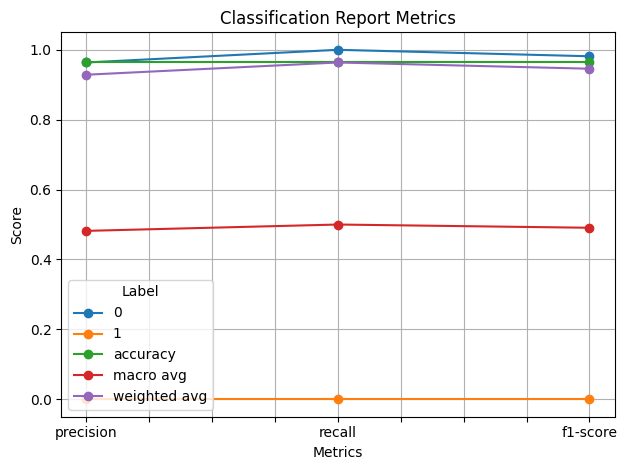

In [22]:
plot_df = report_df[["precision","recall","f1-score"]]
plot_df.T.plot(marker='o')
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Classification Report Metrics")
plt.legend(title="Label")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
import joblib

joblib.dump(clf,"random_forest.pkl")

['random_forest.pkl']

In [ ]:
# import joblib

# # Load random forest
# clf_loaded = joblib.load("random_forest.pkl")


In [23]:
importances = clf.feature_importances_
for name, val in zip(X.columns, importances):
    print(f"{name}: {val:.4f}")

height: 0.3391
weight: 0.2508
ape_index: 0.1819
strength: 0.1837
flexibility: 0.0446
